In [72]:
#데이터 불러오기
import pandas as pd 

train = pd.read_csv('~/aiffel/kaggle_kakr_housing/data/train.csv')
test = pd.read_csv('~/aiffel/kaggle_kakr_housing/data/test.csv')

In [73]:
#불러온 데이터 확인
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [74]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [75]:
'''
학습시 진행한 기본적인 전처리 진행 

1. train 데이터 price 따로 빼서 target array로 저장
2. price 값이랑 id 값 drop
3. date 값 연월만 갖는 6자리 정수형 데이터로 변환

'''

#1 
y = train['price']

#2
train.drop(['id', 'price'], axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

#3
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

In [76]:
train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Feature Engineering Idea


### price 분포 확인 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


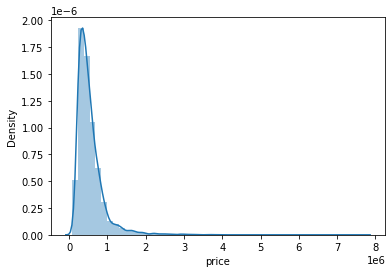

In [77]:
sns.distplot(y)
plt.show()

left-skewed 된 그래프

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


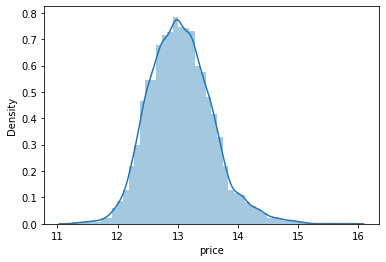

In [78]:
import numpy as np
sns.distplot(np.log1p(y))
plt.show()

In [ ]:
y = np.log1p(y)

### 특성 분류 

In [79]:
# 1. 집의 특징
col_home = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
# 2. 집의 크기
col_sqft = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
# 3. 집의 위치
col_loc = ['long', 'lat', 'zipcode']
# 4. 그 외
['date', 'yr_built', 'yr_renovated']

['date', 'yr_built', 'yr_renovated']

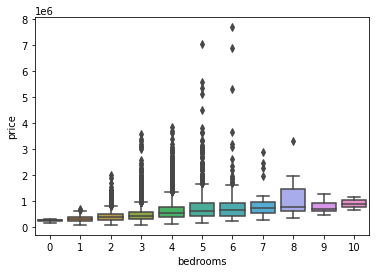

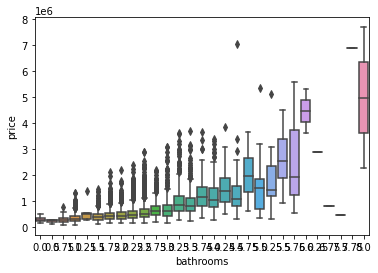

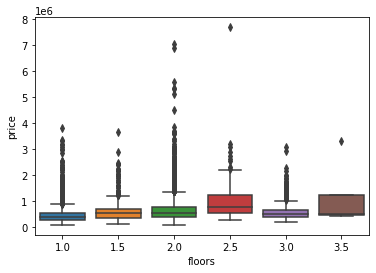

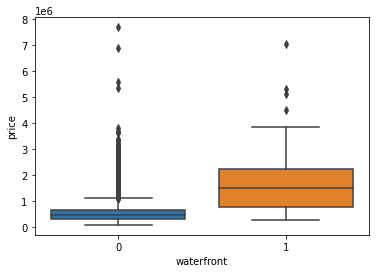

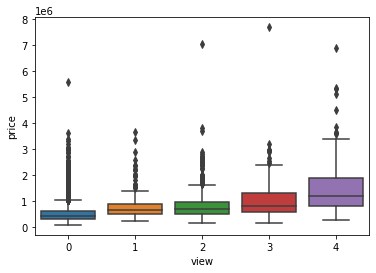

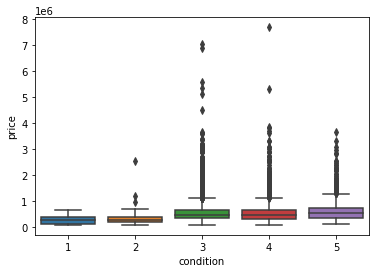

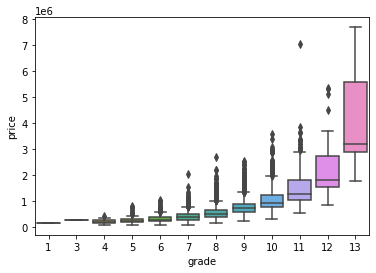

In [80]:
for col in col_home:
    sns.boxplot(x=col, y=y, data=train)
    plt.show()

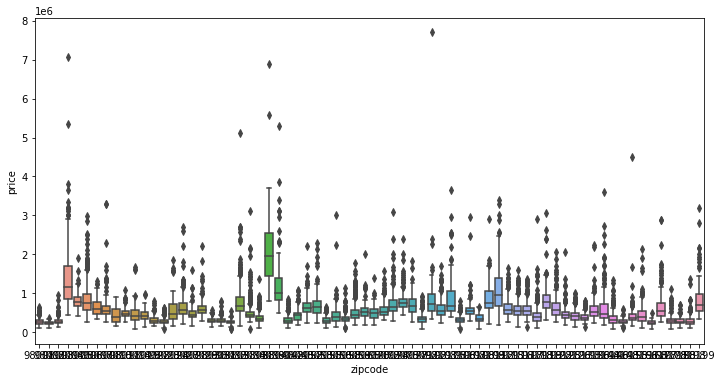

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y=y, data=train)
plt.show()

In [82]:
print(train['date'].max())
print(train['date'].min())
print(test['date'].max())
print(test['date'].min())

201505
201405
201505
201405


동일한 시간대의 데이터

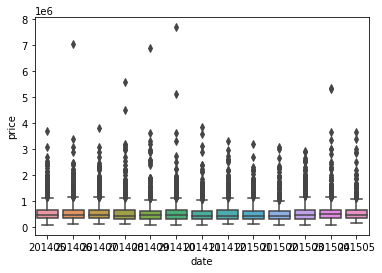

In [83]:
sns.boxplot(x='date', y=y, data=train)
plt.show()

크게 변동없는 분포

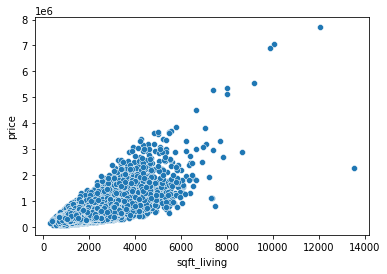

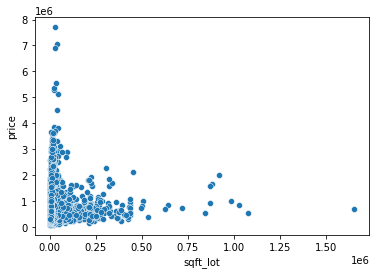

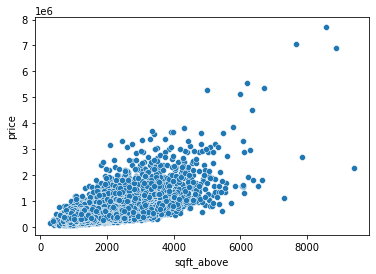

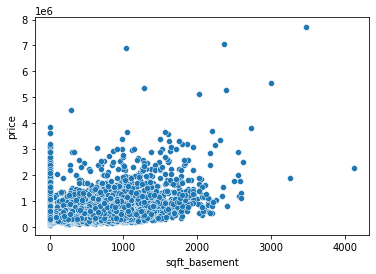

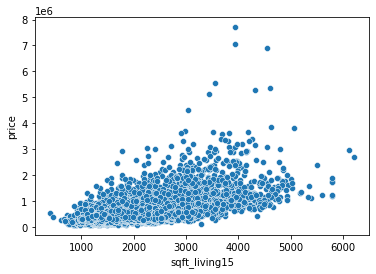

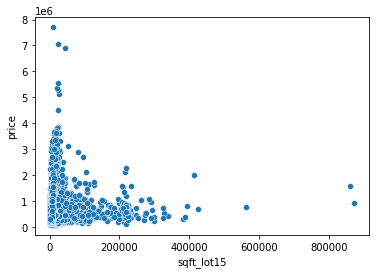

In [84]:
for col in col_sqft:
    sns.scatterplot(x=col, y=y, data=train)
    plt.show()

skewed된 데이터는 log 변환을 시도해보겠다. 

In [85]:
for col in col_sqft:
    train[col] = np.log1p(train[col].values)  # np.log1p 적용시키기 위해서 numpy 배열로 뽑아내고 진행
    test[col] = np.log1p(test[col].values)

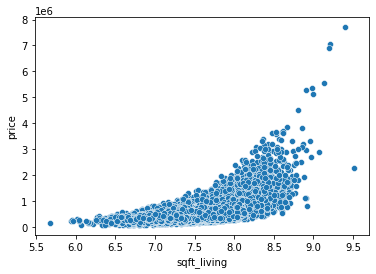

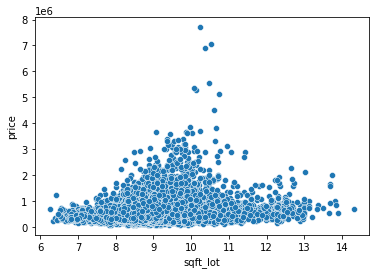

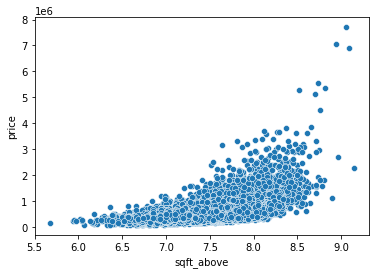

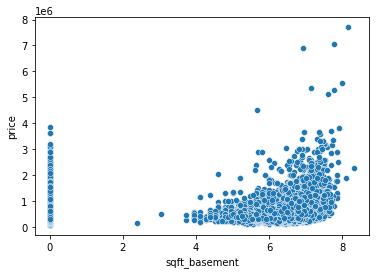

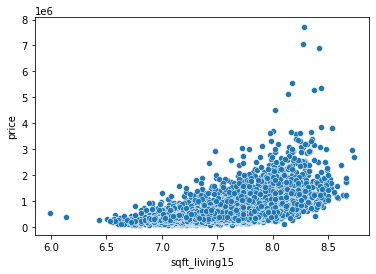

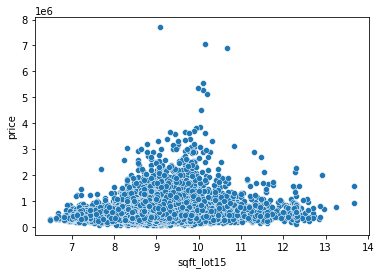

In [86]:
for col in col_sqft:
    sns.scatterplot(x=col, y=y, data=train)
    plt.show()

yr_renovated는 없으면 0, 있으면 yr_built를 대체해도 될거 같다.  

In [87]:
for df in [train,test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [88]:
for df in [train,test]:
    df.drop('yr_built', axis=1, inplace=True)

위치

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

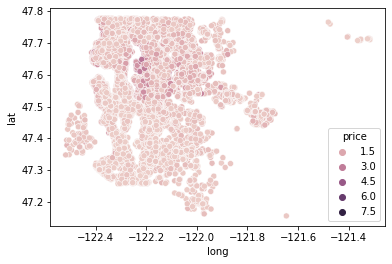

In [89]:
sns.scatterplot('long','lat',hue=y,data=train)

In [90]:
print(train['zipcode'].max())
print(train['zipcode'].min())
print(test['zipcode'].max())
print(test['zipcode'].min())
print(train['lat'].max())
print(train['lat'].min())
print(test['lat'].max())
print(test['lat'].min())
print(train['long'].max())
print(train['long'].min())
print(test['long'].max())
print(test['long'].min())

98199
98001
98199
98001
47.7776
47.1559
47.7776
47.1593
-121.315
-122.519
-121.364
-122.512


의미없는 숫자 제거 

In [91]:
for df in [train,test]:
    df['zipcode'] = df['zipcode'].values - 98000

In [92]:
for df in [train,test]:
    df['lat'] = df['lat'].values - 47
    df['long'] = df['long'].values + 121

In [93]:
for df in [train,test]:
    df['zipcode_3'] = df['zipcode'].values // 100
    df['zipcode_45'] = df['zipcode'] - df['zipcode_3']*100

zipcode 분류 

In [94]:
for df in [train,test]:
    df.drop('zipcode', axis=1, inplace=True)

In [119]:
list(train.columns) == list(test.columns)

True

일단 실험 

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2024)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predict = model.predict(X_test)

def rmse 
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(predict)))
print(rmse)

166845.44763502653


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [50, 100],
'max_depth': [10, 20, 30],
}

model = RandomForestRegressor(random_state=2024)
    
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(train, y)
        

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2024),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [100]:
params = grid_search.cv_results_['params']
params
score = grid_search.cv_results_['mean_test_score']
score

array([-0.03507656, -0.03483358, -0.03189074, -0.0315392 , -0.03191835,
       -0.03155413])

In [101]:
print("Best parameter: ", grid_search.best_params_)

Best parameter:  {'max_depth': 20, 'n_estimators': 100}


In [102]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=2024)
model.fit(train,y)
predictions = model.predict(test)
predictions = np.expm1(predictions)

In [112]:
import os
from os.path import join

data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = predictions
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'rf')
submission.to_csv(submission_csv_path, index=False)

In [110]:
submission

,id,price
0,15035,4.627734e+05
1,15036,4.945266e+05
2,15037,1.287296e+06
3,15038,3.046318e+05
4,15039,3.247968e+05
...,...,...
6463,21498,2.344258e+05
6464,21499,4.087724e+05
6465,21500,4.747001e+05
6466,21501,3.315380e+05


## 추가 수정 사항

### 학습부터

In [117]:
random_state=2024
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [6468, 15035]

In [114]:
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
randomforest = RandomForestRegressor(random_state=random_state)

In [115]:
def get_scores(models, X_train, y_train, X_test, y_test):
    df = {}
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
    return df

In [116]:
models = [xgboost, lightgbm, randomforest]
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 163076.36036717534,
 'LGBMRegressor': 162084.4630062195,
 'RandomForestRegressor': 161764.71794420684}

In [121]:
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_3,zipcode_45
0,201410,3,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.000000,1955.0,0.5112,-1.257,7.201171,8.639588,1,78
1,201502,2,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.000000,1933.0,0.7379,-1.233,7.908755,8.995041,0,28
2,201502,3,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.000000,1987.0,0.6168,-1.045,7.496097,8.923191,0,74
3,201406,3,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.000000,1995.0,0.3097,-1.327,7.713785,8.827615,0,3
4,201501,3,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.000000,1963.0,0.4095,-1.315,7.409136,9.181118,1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,7.832411,8.703507,2.0,0,0,3,9,7.832411,0.000000,2014.0,0.5137,-1.167,7.832411,8.703507,0,56
15031,201503,4,3.50,8.163656,8.881975,2.0,0,0,3,9,7.863651,6.814543,2009.0,0.5537,-1.398,7.626083,8.732466,1,36
15032,201405,3,2.50,7.333676,7.031741,3.0,0,0,3,8,7.333676,0.000000,2009.0,0.6993,-1.346,7.333676,7.319865,1,3
15033,201502,4,2.50,7.745436,8.668024,2.0,0,0,3,8,7.745436,0.000000,2014.0,0.5107,-1.362,7.512618,8.881975,1,46


In [123]:
train = pd.get_dummies(train, columns=['zipcode_45'])
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_45_70,zipcode_45_72,zipcode_45_74,zipcode_45_75,zipcode_45_77,zipcode_45_78,zipcode_45_88,zipcode_45_92,zipcode_45_98,zipcode_45_99
0,201410,3,1.00,7.074117,8.639588,1.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,0
1,201502,2,1.00,6.647688,9.210440,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
2,201502,3,2.00,7.427144,8.997271,1.0,0,0,3,8,...,0,0,1,0,0,0,0,0,0,0
3,201406,3,2.25,7.447751,8.827615,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
4,201501,3,1.50,6.966967,9.181118,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,7.832411,8.703507,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
15031,201503,4,3.50,8.163656,8.881975,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
15032,201405,3,2.50,7.333676,7.031741,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
15033,201502,4,2.50,7.745436,8.668024,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 157263.35519842673,
 'LGBMRegressor': 159260.6648968584,
 'RandomForestRegressor': 161747.97320970337}

원 핫 인코딩으로 나아짐. 

In [127]:
for df in [train,test]:
    df['lat'] = df['lat'].values + 47
    df['long'] = df['long'].values - 121 # 다시 복구해보자 이거 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 157263.6880930812,
 'LGBMRegressor': 159260.95299403346,
 'RandomForestRegressor': 161791.07435450994}

더하고 빼는 건 영향이 없었다. 

In [131]:
for col in col_sqft:
    train[col] = np.expm1(train[col].values) 
    test[col] = np.expm1(test[col].values)

<AxesSubplot:>

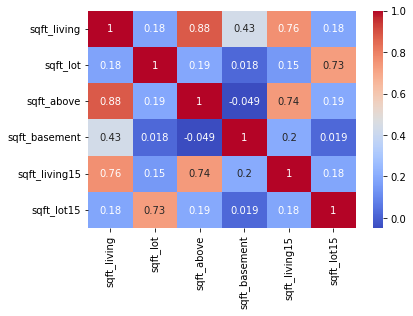

In [133]:
train_sqrt = train[col_sqft]
correlation_matrix = train_sqrt.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [134]:
col_sq = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in col_sq:
    train[col] = np.log1p(train[col].values) 
    test[col] = np.log1p(test[col].values)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 157269.60953007638,
 'LGBMRegressor': 159260.95299403346,
 'RandomForestRegressor': 161838.8999304794}

이것도 큰 영향이 아니었다.


In [136]:
for col in col_sq:
    train[col] = np.expm1(train[col].values) 
    test[col] = np.expm1(test[col].values)

이상치 제거 

In [138]:
train.loc[train['grade']==3]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_45_70,zipcode_45_72,zipcode_45_74,zipcode_45_75,zipcode_45_77,zipcode_45_78,zipcode_45_88,zipcode_45_92,zipcode_45_98,zipcode_45_99
2302,201502,1,0.75,520.0,12981.0,1.0,0,0,5,3,...,0,0,0,0,0,0,0,0,0,0
4123,201411,1,0.00,600.0,24501.0,1.0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


In [141]:
train.drop(2302, inplace=True)
train.drop(4123, inplace=True)

KeyError: '[2302] not found in axis'

In [142]:
y.drop(2302, inplace=True)
y.drop(4123, inplace=True)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 117784.5423746944,
 'LGBMRegressor': 109824.23128609598,
 'RandomForestRegressor': 138732.54832153927}

이상치 제거 후 확 좋아지는 모습 .. 지금부터 RGBM을 해보자 

In [144]:
col_sq = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in col_sq:
    train[col] = np.log1p(train[col].values) 
    test[col] = np.log1p(test[col].values)

In [156]:
train.loc[train['sqft_living'] > np.log1p(13000)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_45_70,zipcode_45_72,zipcode_45_74,zipcode_45_75,zipcode_45_77,zipcode_45_78,zipcode_45_88,zipcode_45_92,zipcode_45_98,zipcode_45_99
8912,201405,7,8.0,9.513477,12.637053,3.0,0,4,3,12,...,0,0,0,0,0,0,0,0,0,0


In [157]:
train.drop(8912, inplace=True)
y.drop(8912, inplace=True)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2024)
get_scores(models, X_train, y_train, X_test, y_test)

{'XGBRegressor': 117793.52734279327,
 'LGBMRegressor': 109824.33283965099,
 'RandomForestRegressor': 138802.65461925126}

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' :[5, 10, 15]
}

lightgbm = LGBMRegressor(random_state=random_state)

grid_model = GridSearchCV(
    lightgbm, param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=4, verbose=1, n_jobs=5
)

grid_model.fit(train, y)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=LGBMRegressor(random_state=2024), n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [147]:
params = grid_model.cv_results_['params']
score = grid_model.cv_results_['mean_test_score']

results = pd.DataFrame(params)
results['score'] = score
results['RMSLE'] = np.sqrt(-1* results['score'])
results = results.sort_values('RMSLE')
results

,learning_rate,max_depth,n_estimators,score,RMSLE
23,0.10,10,300,-0.026151,0.161713
14,0.05,10,300,-0.026175,0.161788
17,0.05,15,300,-0.026179,0.161799
26,0.10,15,300,-0.026229,0.161953
22,0.10,10,200,-0.026250,0.162020
25,0.10,15,200,-0.026307,0.162193
20,0.10,5,300,-0.026394,0.162461
16,0.05,15,200,-0.026697,0.163393
13,0.05,10,200,-0.026698,0.163394
19,0.10,5,200,-0.026873,0.163930


In [149]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

In [161]:
lightgbm = LGBMRegressor(random_state=random_state, 
                        learning_rate=0.1,
                        max_depth =10, 
                         n_estimators= 300)
lightgbm.fit(train, y)
pred1 = lightgbm.predict(test)
pred1 = np.expm1(pred1)
pred1

array([ 483886.96924142,  530268.22485855, 1332568.97639306, ...,
        473107.9443232 ,  307783.37960365,  446803.97802633])

In [154]:
submission['price'] = pred
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'rf')
submission.to_csv(submission_csv_path, index=False)

In [158]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.04, 0.08, 0.12],
    'max_depth' :[5, 10, 15]
}

xgboost =XGBRegressor(random_state=random_state)
grid_model = GridSearchCV(
    lightgbm, param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=4, verbose=1, n_jobs=5
)

grid_model.fit(train, y)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4,
             estimator=LGBMRegressor(max_depth=10, n_estimators=300,
                                     random_state=2024),
             n_jobs=5,
             param_grid={'learning_rate': [0.04, 0.08, 0.12],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [159]:
grid_model.best_params_

{'learning_rate': 0.08, 'max_depth': 15, 'n_estimators': 300}

In [160]:
xgboost = XGBRegressor(random_state=random_state, 
                        learning_rate=0.08,
                        max_depth =15, 
                         n_estimators= 300)
xgboost.fit(train, y)
pred = xgboost.predict(test)
pred = np.expm1(pred)
pred

array([ 510810.5 ,  448788.38, 1245228.1 , ...,  479850.56,  324669.2 ,
        477241.  ], dtype=float32)

In [162]:
submission['price'] = pred
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'xgb')
submission.to_csv(submission_csv_path, index=False)

In [163]:
ensemble_preds = (pred + pred1) / 2

submission['price'] = ensemble_preds
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'ensemble')
submission.to_csv(submission_csv_path, index=False)